# Lab 3: dplyr: A Deep Dive on `group_by()` and `summarize()`

In [ ]:
# install packages
install.packages('ggplot2')
install.packages('dplyr')
install.packages('palmerpenguins')
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# load packages
options(warn=-1)
library(ggplot2)
library(dplyr)
library(palmerpenguins)
library(nycflights13)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Lab 2 review
- ggplot
    - Key Components: 
      - Data
      - Aesthetic Mapping
      - Layer(s) of (geom)etric Objects
    - Plots Covered:
      - Scatterplot (geom_point)
      - Boxplot (geom_boxplot)
      - Barplot (geom_bar)
      - Histogram (geom_histogram)

- dplyr
    - Work Flow: Input Dataframe -> Operation -> New Output Dataframe
    - Core Functions: 
      - Select 
      - Filter
      - Arrange
      - Mutate 
      - Summarise

### Exercise 1: Layering Geometric Object 
Make a scatterplot of bill_depth_mm vs. bill_length_mm and color the points by species. What does adding coloring by species reveal about the relationship between these two variables?

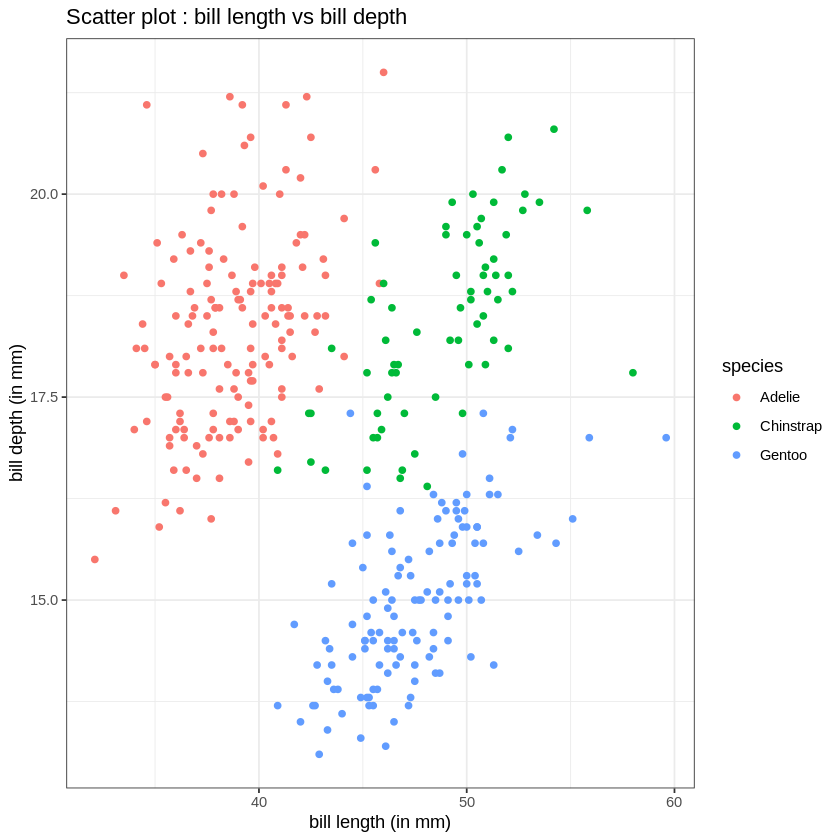

In [ ]:
ggplot(data=penguins) + 
    geom_point(aes(x=bill_length_mm, y=bill_depth_mm,  color = species)) +
    labs(x='bill length (in mm)', y='bill depth (in mm)') + 
    ggtitle('Scatter plot : bill length vs bill depth') +  
    theme_bw() 

### Exercise 2: Plotting Barplots, Histograms, and Boxplots
Create the following grahics:

1. A barplot for the counts of `species` subvided by island of which **the bars are not overlapped**.

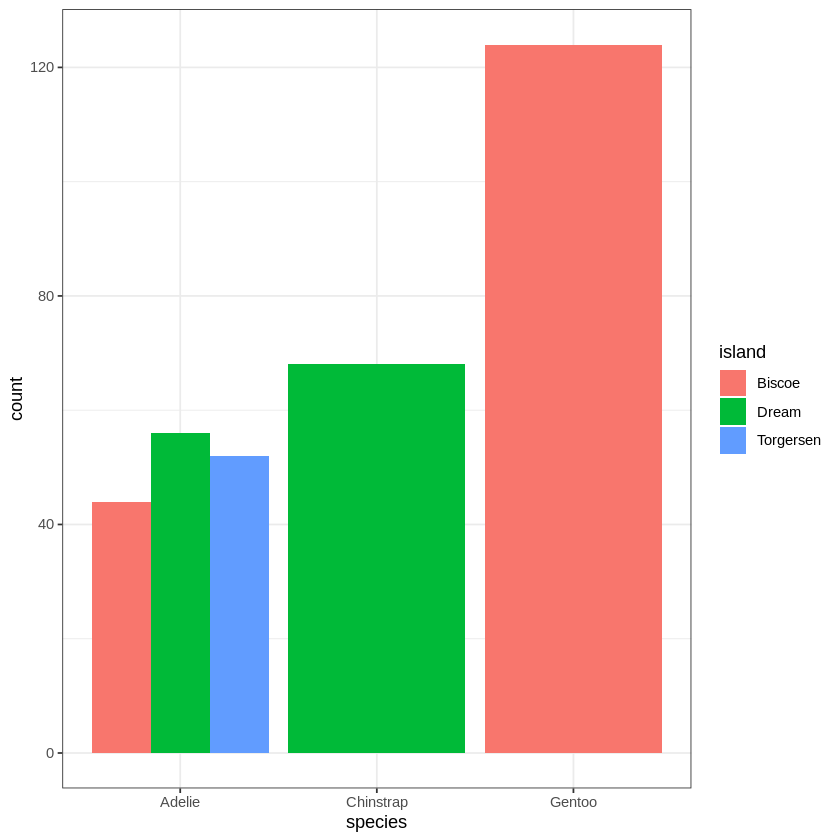

In [ ]:
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar( position = "dodge") +
  theme_bw()

2. A histogram plot for `body_mass_g`

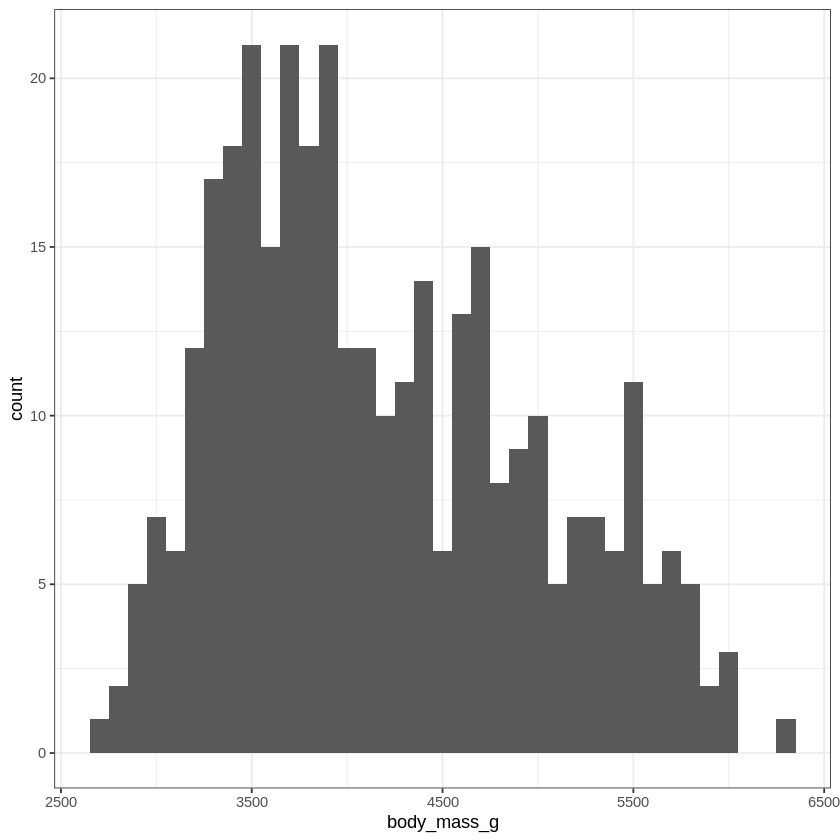

In [ ]:
ggplot(penguins, aes(x = body_mass_g)) +
  geom_histogram(binwidth = 100) +
  theme_bw()

3. A boxplot that explores the relationship between penguins's `sex` and `body_mass_g` **where the penguins' sex is the y-axis**.

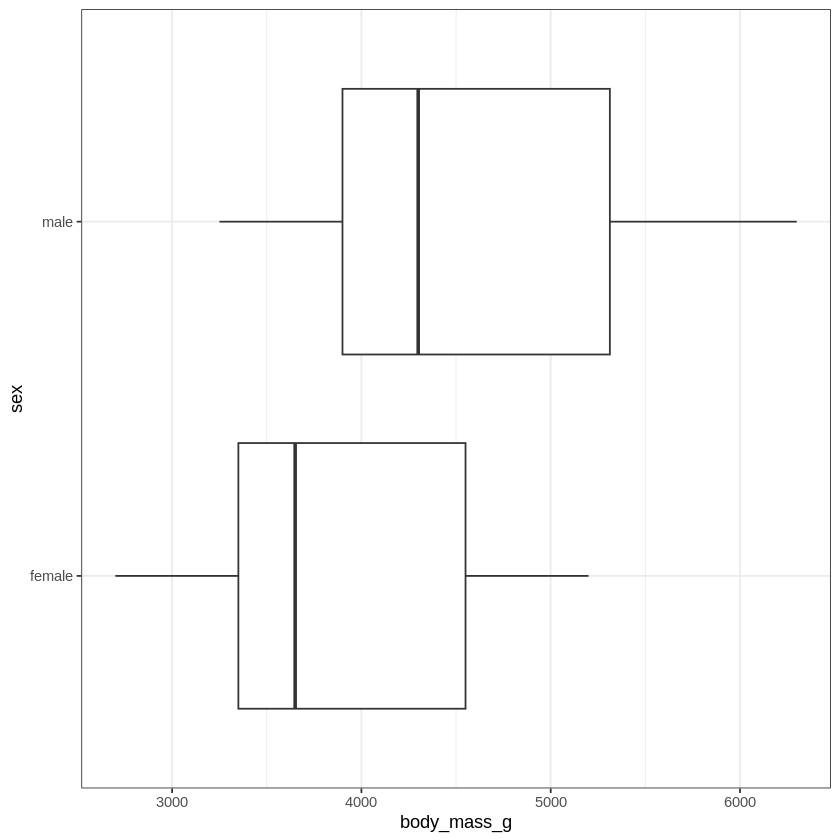

In [ ]:
penguins_nona = penguins %>% na.omit()
ggplot(penguins_nona, aes(x = sex, y = body_mass_g)) +
  geom_boxplot() +
  coord_flip() +
  theme_bw()

### Exercise 3: dplyr functions in dataset `flights` 
1. Write code that wil have `tailnum` as the first column and the columns starting with the 
letter 'd' as the following columns.

In [ ]:
# 1 select
flights %>% 
  select(tailnum, starts_with('d')) %>%
  print()

# A tibble: 336,776 × 6
   tailnum   day dep_time dep_delay dest  distance
   <chr>   <int>    <int>     <dbl> <chr>    <dbl>
 1 N14228      1      517         2 IAH       1400
 2 N24211      1      533         4 IAH       1416
 3 N619AA      1      542         2 MIA       1089
 4 N804JB      1      544        -1 BQN       1576
 5 N668DN      1      554        -6 ATL        762
 6 N39463      1      554        -4 ORD        719
 7 N516JB      1      555        -5 FLL       1065
 8 N829AS      1      557        -3 IAD        229
 9 N593JB      1      557        -3 MCO        944
10 N3ALAA      1      558        -2 ORD        733
# … with 336,766 more rows


2. Write code using filter that selects all the rows of `carrier` 'AA' on the last day of month.

In [ ]:
# 2 filter
month31 = c(1, 3, 5, 7, 8, 10, 12)
month30 = c(4, 6, 9, 11)
month28 = c(2)
# use filter with complex conditions
flights %>% 
  filter(carrier == 'AA') %>%
  filter( ( (month %in% month31) & (day == 31) ) | 
          ( (month %in% month30) & (day == 30) ) | 
          ( (month %in% month28) & (day == 28) ) ) %>%
  print()

# A tibble: 1,055 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1    31      540        540       0     851     850       1 AA     
 2  2013     1    31      554        600      -6     900     910     -10 AA     
 3  2013     1    31      554        600      -6     726     745     -19 AA     
 4  2013     1    31      600        610     -10     911     910       1 AA     
 5  2013     1    31      607        610      -3     924     915       9 AA     
 6  2013     1    31      626        630      -4     740     810     -30 AA     
 7  2013     1    31      628        635      -7     932     940      -8 AA     
 8  2013     1    31      638        630       8    1147    1140       7 AA     
 9  2013     1    31      651        700      -9     839     850     -11 AA     
10  2013     1    31      659        700      -1    1059    1015      44 AA     
# … w

3. Use arrange to sort flights dataset by descending order of the division of distance by `air_time`.

In [ ]:
# 3 arrange
flights %>% 
  arrange(desc(distance / air_time)) %>%
  print()

# A tibble: 336,776 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     5    25     1709       1700       9    1923    1937     -14 DL     
 2  2013     7     2     1558       1513      45    1745    1719      26 EV     
 3  2013     5    13     2040       2025      15    2225    2226      -1 EV     
 4  2013     3    23     1914       1910       4    2045    2043       2 EV     
 5  2013     1    12     1559       1600      -1    1849    1917     -28 DL     
 6  2013    11    17      650        655      -5    1059    1150     -51 DL     
 7  2013     2    21     2355       2358      -3     412     438     -26 B6     
 8  2013    11    17      759        800      -1    1212    1255     -43 AA     
 9  2013    11    16     2003       1925      38      17      36     -19 DL     
10  2013    11    16     2349       2359     -10     402     440     -38 B6     
# …

4. Create the new column `speed` calculated by the division of `distance` by `air_time` at the first column.

In [ ]:
# 4 mutate
flights %>% 
  mutate(speed = distance / air_time * 60, .before = 1) %>%
  print()

# A tibble: 336,776 × 20
   speed  year month   day dep_time sched_dep_…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵
   <dbl> <int> <int> <int>    <int>        <int>   <dbl>   <int>   <int>   <dbl>
 1  370.  2013     1     1      517          515       2     830     819      11
 2  374.  2013     1     1      533          529       4     850     830      20
 3  408.  2013     1     1      542          540       2     923     850      33
 4  517.  2013     1     1      544          545      -1    1004    1022     -18
 5  394.  2013     1     1      554          600      -6     812     837     -25
 6  288.  2013     1     1      554          558      -4     740     728      12
 7  404.  2013     1     1      555          600      -5     913     854      19
 8  259.  2013     1     1      557          600      -3     709     723     -14
 9  405.  2013     1     1      557          600      -3     838     846      -8
10  319.  2013     1     1      558          600      -2     753     745       8
# …

## Grouping

Grouping is an incredibly important operation in data science. When working with a dataset, you may want to calculate a metric not for every row, but rather for every unique combination (group) in the dataset. 

For example, suppose I wanted to determine the average departure delay for each day of the year. This would be a relevant research question because it would inform airlines what times of the year to be proactive about potential delay waves and create proper accommodations in advance. 

To answer this though, I would need to create **groups**. The challenge is determining what variables we need to *"group by"* in order to conduct our inference. This is the motivation for the name `group_by()`. In our case, we would need to group by the year, month, and day, because those variables define a specific day. **For each day**, I want to collect all the flights, and calculate the mean and median departure delay. 

With this objective in mind, let's start by creating the grouping by days and observing what happens.

In [ ]:
# showcasing the original dataset
flights %>%
  print()

# A tibble: 336,776 × 19
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      544        545      -1    1004    1022     -18 B6     
 5  2013     1     1      554        600      -6     812     837     -25 DL     
 6  2013     1     1      554        558      -4     740     728      12 UA     
 7  2013     1     1      555        600      -5     913     854      19 B6     
 8  2013     1     1      557        600      -3     709     723     -14 EV     
 9  2013     1     1      557        600      -3     838     846      -8 B6     
10  2013     1     1      558        600      -2     753     745       8 AA     
# …

In [ ]:
# showcasing the grouped dataset
flights %>% 
  group_by(year, month, day) %>% 
    print()

# A tibble: 336,776 × 19
# Groups:   year, month, day [365]
    year month   day dep_time sched_de…¹ dep_d…² arr_t…³ sched…⁴ arr_d…⁵ carrier
   <int> <int> <int>    <int>      <int>   <dbl>   <int>   <int>   <dbl> <chr>  
 1  2013     1     1      517        515       2     830     819      11 UA     
 2  2013     1     1      533        529       4     850     830      20 UA     
 3  2013     1     1      542        540       2     923     850      33 AA     
 4  2013     1     1      544        545      -1    1004    1022     -18 B6     
 5  2013     1     1      554        600      -6     812     837     -25 DL     
 6  2013     1     1      554        558      -4     740     728      12 UA     
 7  2013     1     1      555        600      -5     913     854      19 B6     
 8  2013     1     1      557        600      -3     709     723     -14 EV     
 9  2013     1     1      557        600      -3     838     846      -8 B6     
10  2013     1     1      558        600      -2 

So what gives? These datasets look identical. We also know that the pipe operator takes in an input dataset, performs an operation, and outputs a new dataset. So, why are they completely the same?

The answer lies in that the `group_by()` function **does not modify the input dataset at all**, but rather stores the groups behind the scenes for future computation. You can even notice that the second line of the grouped dataset states: "# Groups:   year, month, day [365]". This shows you which variables are being used for future grouping and how many unique groups there are (365 since 2013 is not a leap year and has 365 days).

In the next section we will learn to `summarize()` our grouped data based on some metrics that are of interest to us.

## Summarize
`summarize()` - like any other operation - is an operation in our pipeline. It takes in an input dataset, performs some calculations, and outputs a new dataframe. It is generally used in tandem with `group_by()`; it receives as input a dataset with a grouping structure included and it outputs a "summary" (hence the name summarize) of a new variable. 

Referring back to the example above, we want to calculate the mean and median departure delay of each day in 2013. This is exactly the `group_by()` and `summarize()` yin and yang relationship.


In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(
    median_dep_delay = median(dep_delay, na.rm = T),
    mean_dep_delay = mean(dep_delay, na.rm = T)
  )

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


year,month,day,median_dep_delay,mean_dep_delay
<int>,<int>,<int>,<dbl>,<dbl>
2013,1,1,-1,11.548926
2013,1,2,0,13.858824
2013,1,3,0,10.987832
2013,1,4,-1,8.951595
2013,1,5,-1,5.732218
2013,1,6,-1,7.148014
2013,1,7,-2,5.417204
2013,1,8,-2,2.553073
2013,1,9,-4,2.276477


The new dataframe contains one or more rows of grouping variables; this depends on the number of types of grouping variables. It will include one column for each grouping variable, and one column for each summary (in our cas: year, month, day, median_dep_delay, mean_dep_delay).

<u>Note</u>: We have to use "na.rm = T" in calculating summary values because R does not know how to numerically handle missing values. "na.rm = T" is shorthand for "remove missing values status is True."

<u>Side Note</u>: `summarise()` and `summarize()` are synonyms and can be used interchangably (Source: https://dplyr.tidyverse.org/reference/summarise).

### Exercise 4

Find the distribution of the number of flights that a plane takes. Each plane is uniquely determined by its `tailnum`. 

<u>*Hint*</u>: Before doing the question, think about what the grouping variable(s) should be.

<u>*Hint*</u>: You can count the number of occurrences of something using `n()`. You can see an example case below to see the number of times each month appears in the flights dataset.

### count rows with n()

In [ ]:
# count number of flights by month
flights %>%
  group_by(month) %>% 
  summarize(
    n = n(), # equals to n = sum(month)
  ) %>% 
  arrange(desc(n)) %>%
  print()

# A tibble: 12 × 2
   month     n
   <int> <int>
 1     7 29425
 2     8 29327
 3    10 28889
 4     3 28834
 5     5 28796
 6     4 28330
 7     6 28243
 8    12 28135
 9     9 27574
10    11 27268
11     1 27004
12     2 24951


In [ ]:
#@title Answer to Exercise 4
count_by_tail <- flights %>%
  group_by(tailnum) %>% 
  summarize(n = n())

print(quantile(count_by_tail$n))

ggplot(count_by_tail, aes(x = n)) +
  geom_histogram(binwidth = 50) +
  theme_bw()

# long tailed and right skewed

Notice that `n()` will include missing values. If we want the counts without missing value, we can use `sum(!is.na(tailnum))`

In [ ]:
na_removed_count_by_tail <- flights %>%
  group_by(tailnum) %>% 
  summarize(n = sum(!is.na(tailnum)))

# use setdiff() function to check the differences between two dataframes
setdiff(count_by_tail, na_removed_count_by_tail)

tailnum,n
<chr>,<int>
NA,2512


### sum, mean, maximum, minimum, median, quantiles, sd, IQR

`sum()` returns to summation, `mean()` gives the average value, `min()` and `max()` will give you the largest and smallest values respectively. Another powerful tool is `quantile()` which is a generalization of the median: `quantile(x, 0.25)` will find the value of x that is greater than 25% of the values. Two commonly used summaries to measure the spread of data values are the standard deviation, `sd()`, and the inter-quartile range, `IQR()`. `IQR(x)` is defined as `quantile(x, 0.75)` - `quantile(x, 0.25)`.

In [ ]:
flights %>%
  group_by(year, month, day) %>%
  summarize(
    sum = sum(dep_delay, na.rm = TRUE),
    mean = mean(dep_delay, na.rm = TRUE), # mean departure delay
    max = max(dep_delay, na.rm = TRUE), # max departure delay
    min = min(dep_delay, na.rm = TRUE), # min departure delay
    median = median(dep_delay, na.rm = TRUE), # median departure delay
    q5 = quantile(dep_delay, 0.05, na.rm = TRUE), # 5 percentile value of departure delay
    q95 = quantile(dep_delay, 0.95, na.rm = TRUE), # 95 percemntile of departure delay
    sd = sd(dep_delay, na.rm = TRUE), # standard deviation of departure delay
    IQR = IQR(dep_delay, na.rm = TRUE), # IQR of departure delay.
    .groups = "drop"
) %>% print()

# A tibble: 365 × 12
    year month   day   sum  mean   max   min median     q5   q95    sd   IQR
   <int> <int> <int> <dbl> <dbl> <dbl> <dbl>  <dbl>  <dbl> <dbl> <dbl> <dbl>
 1  2013     1     1  9678 11.5    853   -15     -1  -8     70.1  45.3  13  
 2  2013     1     2 12958 13.9    379   -13      0  -7     85    37.2  17  
 3  2013     1     3  9933 11.0    291   -13      0  -7.85  68    31.5  15  
 4  2013     1     4  8137  8.95   288   -19     -1  -8     60    27.7  14  
 5  2013     1     5  4110  5.73   327   -16     -1  -8     41    25.7   9  
 6  2013     1     6  5940  7.15   202   -15     -1  -8     51    23.2  11.5
 7  2013     1     7  5038  5.42   366   -17     -2  -9     51.6  27.1   8  
 8  2013     1     8  2285  2.55   188   -16     -2 -10     35.3  19.3   6  
 9  2013     1     9  2042  2.28  1301   -17     -4 -10     27.2  46.9   6  
10  2013     1    10  2643  2.84  1126   -17     -4 -10     31    43.9   6  
# … with 355 more rows


<u>**Discussion Question**</u>: What is the use case for each of these summary statistics?

### Exercise 5
Find the flights that are not cancelled. Draw a scatter plot where each point represents an individual plane with the number of flights that plane has taken on the x-axis and the average arrival delay on the y axis.

<u>*Hint*</u>: A flight in our case is considered cancelled if the arrival delay is missing.

<u>*Hint*</u>: For each plane (determined by `tailnum`) you will need to calculate the number of flights it had (count the number of times each plane was flown) and the average arrival delay.

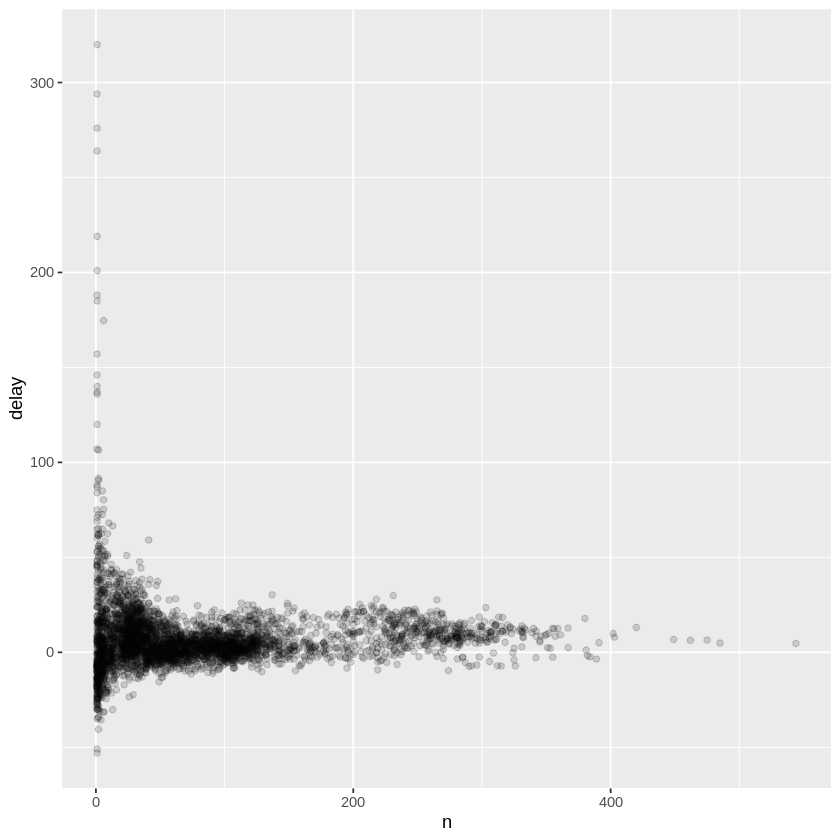

In [48]:
#@title Answer to Exercise 5
not_cancelled <- flights %>% 
  filter(!is.na(arr_delay))

not_cancelled %>% 
  group_by(tailnum) %>% 
  summarize(
    delay = mean(arr_delay),
    n = n()) %>%
  ggplot() + geom_point(aes(x = n,y = delay), alpha=0.15)

### Extracting the First, Last, and Nth value
We can find the first object of `x` using `first(x)`, the last object using `last(x)`, and the nth object using `nth(x, n)`. These functions are equivalent to `x[1]`, `x[length(x)]`, `x[n]`, except that when no value can be found (i.e.`x[1]` is `NA`), the `default` setting in the former functions allow the code work without error.

In [ ]:
# find the first, 900th, and lastg arrival time everyday
not_cancelled %>%
  group_by(year, month,day) %>% 
  summarize(first_arr = first(arr_time), # equivalent to nth(arr_time, 1)
            nine_hundredth_arr = nth(arr_time, 900),
            last_arr = last(arr_time),
            num_arr = n()) %>%
  print()

`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


# A tibble: 365 × 7
# Groups:   year, month [12]
    year month   day first_arr nine_hundredth_arr last_arr num_arr
   <int> <int> <int>     <int>              <int>    <int>   <int>
 1  2013     1     1       830                 NA      425     831
 2  2013     1     2       518                 43      413     928
 3  2013     1     3       504                434      434     900
 4  2013     1     4       505                257      436     908
 5  2013     1     5       503                 NA      432     717
 6  2013     1     6       451                 NA      433     829
 7  2013     1     7       531               2220      506     930
 8  2013     1     8       625                 NA      417     892
 9  2013     1     9       432                 NA       12     893
10  2013     1    10       426               2206       16     929
# … with 355 more rows


### Excercise 5
1. Which `carrier` has the longest arrival delay time on average? 
2. How is the performance comparing to other carriers in the same route? Consider the differences of mean arrival delay between one carrier and the others. 

In [ ]:
#@title Answer to Exercise 5.1
flights %>% 
  group_by(carrier) %>%
  summarize(avg_arr_delay = mean(arr_delay,na.rm = T)) %>%
  arrange(desc(avg_arr_delay)) %>% print()

In [ ]:
#@title Answer to Exercise 5.2
flights %>%
  filter(!is.na(arr_delay)) %>%
  group_by(origin, dest, carrier) %>%
  summarise(
    arr_delay = sum(arr_delay), # Total delay time by carrier within each route
    flights = n()
  ) %>%
  group_by(origin, dest) %>%
  mutate(
    arr_delay_total = sum(arr_delay), # Total delay time within each route
    flights_total = sum(flights)
  ) %>%
  ungroup() %>% # ungroup data that `group_by(origin, dest)`
  mutate(
    arr_delay_others = (arr_delay_total - arr_delay) / (flights_total - flights), # NA exist when only one carrier in a route
    arr_delay_carrier = arr_delay / flights,
    arr_delay_diff = arr_delay_carrier - arr_delay_others
  ) %>% 
  filter(!is.na(arr_delay_diff)) %>% # remove NA
  group_by(carrier) %>%
  summarise(arr_delay_diff = mean(arr_delay_diff)) %>%
  arrange(desc(arr_delay_diff)) %>% print()